# Prediction of Sales Revenue using Scikit-Learn

**In This project we are going to predict the sales revenue using multiple linear regression model**

In [1]:
# Importing libraries
%matplotlib inline 
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# Importing the dataset
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
# Removing the Index column
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


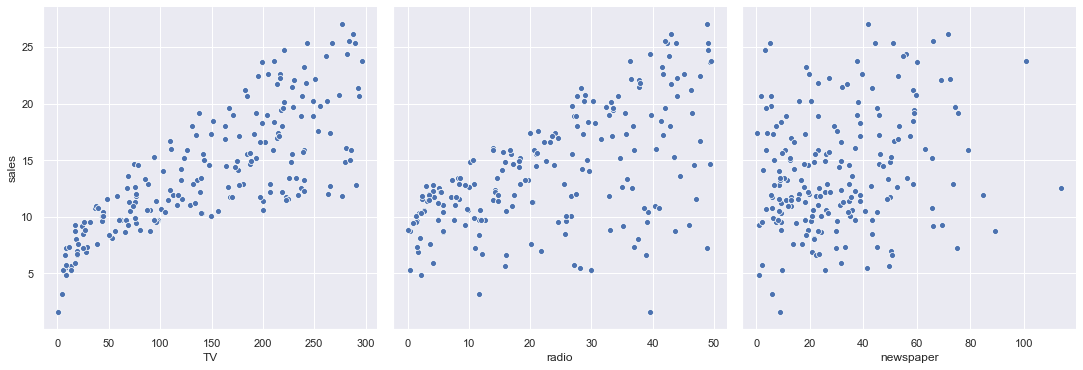

In [6]:
### Exploring Relationship between Predictors and Response
sns.pairplot(df, x_vars = ['TV', 'radio', 'newspaper'], y_vars = 'sales', height = 5)
plt.show()

In [7]:
# Multiple Linear regression - Estimating coefficients
from sklearn.linear_model import LinearRegression
X = df.iloc[: , :-1]
y = df.iloc[: , -1]

lm1 = LinearRegression()
lm1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
lm1.intercept_

2.9388893694594085

In [9]:
lm1.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [10]:
list(zip(['TV', 'radio', 'newspaper'], lm1.coef_))

[('TV', 0.045764645455397615),
 ('radio', 0.18853001691820456),
 ('newspaper', -0.0010374930424763272)]

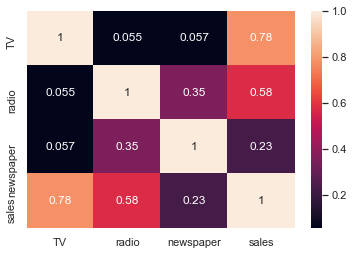

In [11]:
sns.heatmap(df.corr(), annot = True)
plt.show()

## Feature Selection

In [12]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[['TV', 'radio']], y)
lm2_pred = lm2.predict(X[['TV', 'radio']])

print(f"R^2 Score of our model is {r2_score(y, lm2_pred)}")

R^2 Score of our model is 0.8971942610828956


In [13]:
lm3 = LinearRegression().fit(X[['TV', 'radio', 'newspaper']], y)
lm3_pred = lm3.predict(X[['TV', 'radio', 'newspaper']])

print(f"R^2 Score of our model is {r2_score(y, lm3_pred)}")

R^2 Score of our model is 0.8972106381789522


## Model Evaluation

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['TV', 'radio', 'newspaper']]
y = df.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm4 = LinearRegression().fit(X_train, y_train)
lm4_pred = lm4.predict(X_test)

print(f"RMSE of our model is : {np.sqrt(mean_squared_error(y_test, lm4_pred))}")
print(f"R^2 of our model is : {r2_score(y_test, lm4_pred)}")

RMSE of our model is : 1.404651423032895
R^2 of our model is : 0.9156213613792232


In [15]:
X = df[['TV', 'radio']]
y = df.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm5 = LinearRegression().fit(X_train, y_train)
lm5_pred = lm5.predict(X_test)

print(f"RMSE of our model is : {np.sqrt(mean_squared_error(y_test, lm5_pred))}")
print(f"R^2 of our model is : {r2_score(y_test, lm5_pred)}")

RMSE of our model is : 1.3879034699382886
R^2 of our model is : 0.9176214942248908


**we can say that lm5 model (without newspaper variable) will be better for this dataset.**

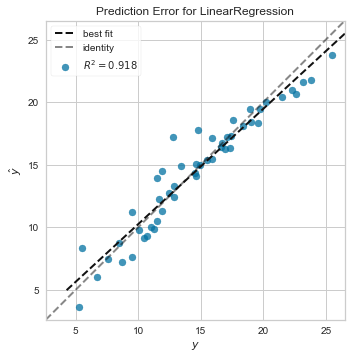

In [17]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(lm5).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

## Interaction Effect (Synergy)

In [18]:
df['interaction'] = df['TV'] * df['radio']

X = df[['TV', 'radio', 'interaction']]
y = df.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm6 = LinearRegression().fit(X_train, y_train)
lm6_pred = lm6.predict(X_test)

print(f"RMSE of our model is : {np.sqrt(mean_squared_error(y_test, lm6_pred))}")
print(f"R^2 of our model is : {r2_score(y_test, lm6_pred)}")

RMSE of our model is : 0.7011871137164325
R^2 of our model is : 0.9789736814681261


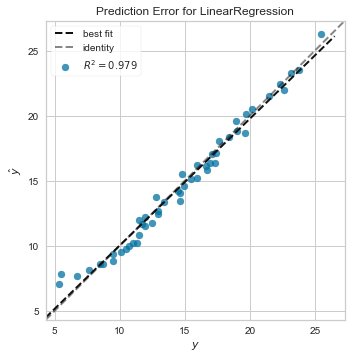

In [20]:
visualizer = PredictionError(lm6).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();